In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# mnist data 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 이미지 shape 살펴보기
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

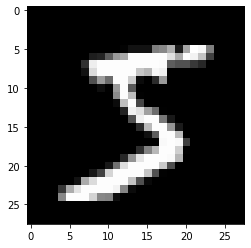

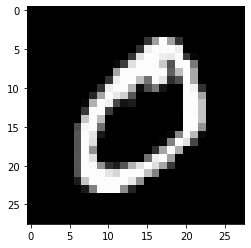

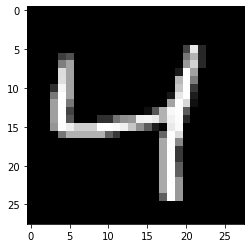

In [ ]:
# 데이터 살펴보기
for i in x_train[:3]:
    plt.imshow(i, cmap="gray")
    plt.show()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# 이미지 정규화
# 255로 나누면 0~1값을 가지게 됨
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
np.max(x_train[0])

1.0

In [ ]:
np.min(x_train[0])

0.0

In [ ]:
# y의 라벨의 개수는 몇개인가?
len(np.unique(y_train))

10

In [ ]:
# unique 수 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.reshape(60000, 28*28).shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # y 라벨의 unique수를 넣어 줍니다
])

## Crossentropy
-  이진분류: binary_crossentropy
-  다중분류: categorical_crossentropy -> y값이 one-hot 인코딩
-          sparse_categorical_crossentropy -> y값이 label 인코딩

In [ ]:
y_train.shape

(60000,)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1022 - accuracy: 0.9688 - val_loss: 0.1291 - val_accuracy: 0.9612
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0703 - accuracy: 0.9772 - val_loss: 0.1025 - val_accuracy: 0.9705
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 0.0932 - val_accuracy: 0.9728
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.0982 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0930 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.1080 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0990 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model 평가
loss, acc = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.1475 - accuracy: 0.9791


In [ ]:
# 이미지인데 channel에 대한 정보가 없음 
# 흑백 이미지 -> 1채널 , 채널추가 해줘야함 , MLP 에서는 안해줘도 되지만 CNN에서는 해야함
# 이미지 데이터 shape -> (가로,세로,채널)
x_train.shape

(60000, 28, 28)

In [ ]:
# (개수, 가로, 세로, 채널)
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
temp_image = keras.preprocessing.image.random_rotation(
    x_train[0], 30
) # image를 random으로 로테이션 해주는 함수

In [ ]:
temp_image = np.squeeze(temp_image) # 축 제거

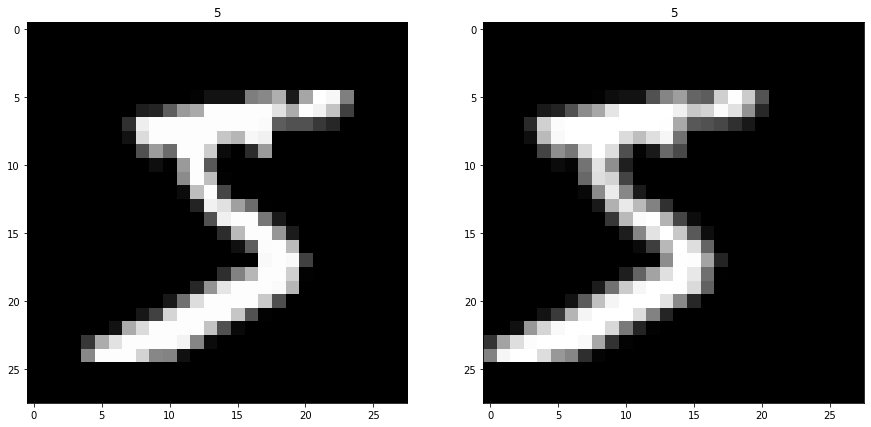

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(x_train[0]), "gray")
plt.title(f"{y_train[0]}")

plt.subplot(1,2,2)
plt.imshow(temp_image,"gray")
plt.title(f"{y_train[0]}")
plt.show()

In [ ]:
# temp_image = temp_image.reshape(1, -1)
# temp_image.shape

(1, 784)

In [ ]:
temp_image = temp_image.reshape(1, 28, 28)

In [ ]:
pred = model.predict(temp_image, batch_size=1)

In [ ]:
# argmax
np.argmax(pred)

3